# Machine Learning with R - Theory and Applications 

## 1 - Why to Build Models ?

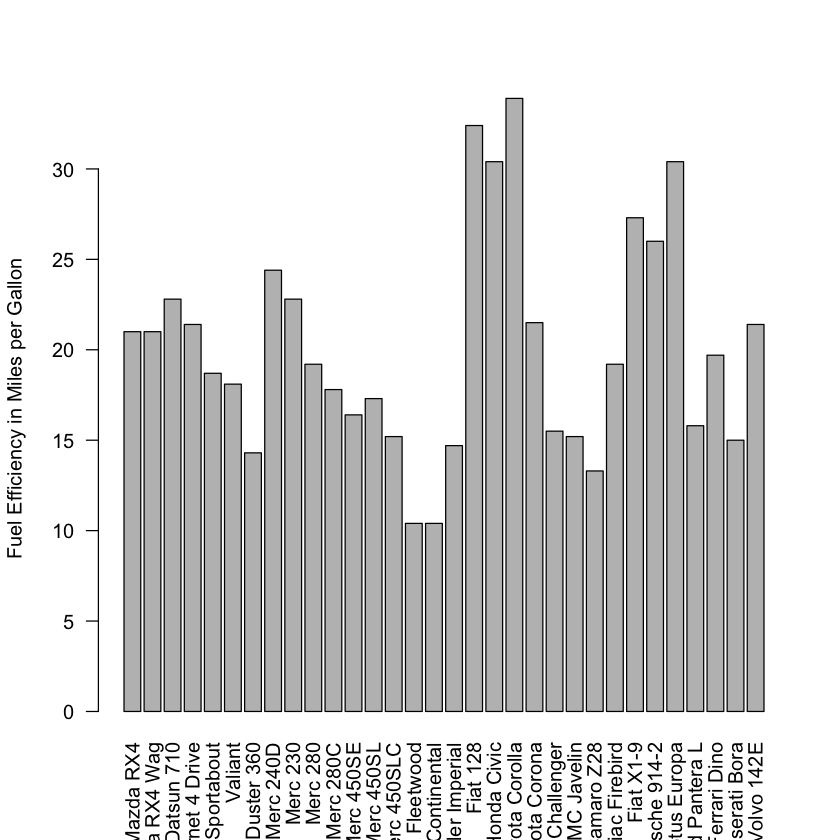

In [3]:
barplot(mtcars$mpg, names.arg = row.names(mtcars), las = 2, ylab = "Fuel Efficiency in Miles per Gallon")

So how do we turn this boring report into something more useful? How do we bridge the gap between reporting
and machine learning?

Let’s take a look at the built-in mtcars dataset that comes with R in more detail:

In [ ]:
data("mtcars")

In [ ]:
head(mtcars)

In [ ]:
summary(mtcars)

By just calling the built-in object of mtcars within R, we can see all sorts of columns in the data from which to 
choose to build a machine learning model. In the machine learning world, columns of data are sometimes also 
called features.

### try seeing if there’s a relationship between the car’s fuel efficiency and any one of these features 

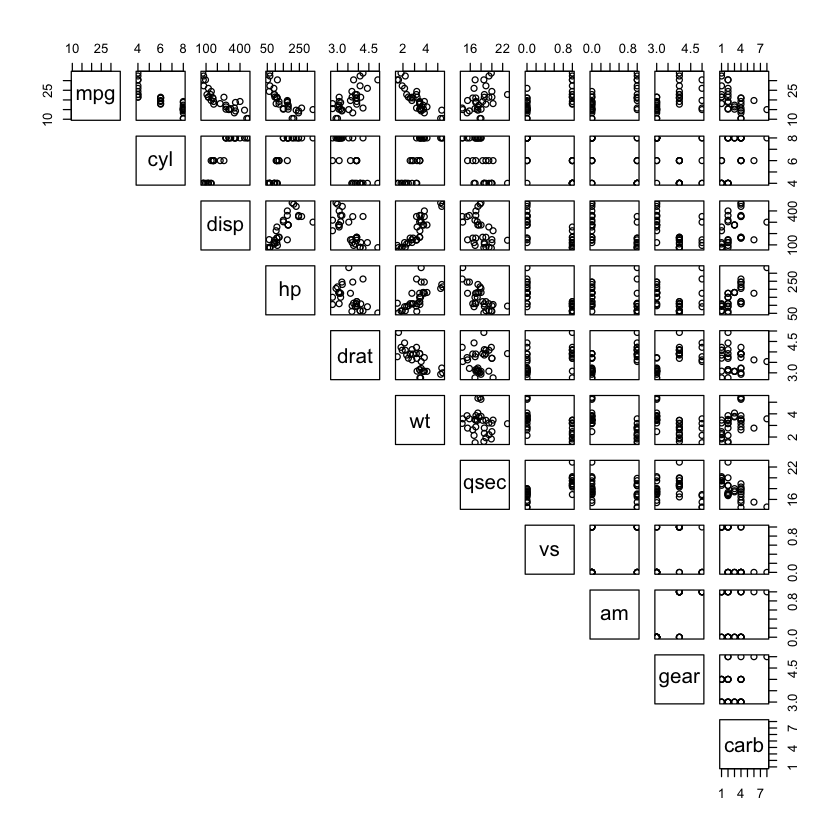

In [4]:
pairs(mtcars, lower.panel = NULL) #Observação 1:10, features... 

### You can read the upper-right plot as “mpg as a function of SOMETHING,” 

### mostly interested in something that looks like it might have some kind of quantifiable relationship. 

### This is up to the investigator to pick out what patterns look interesting. Note that “mpg as a function of cyl (cylinders)” looks very different from “mpg as a function of wt (weight).”

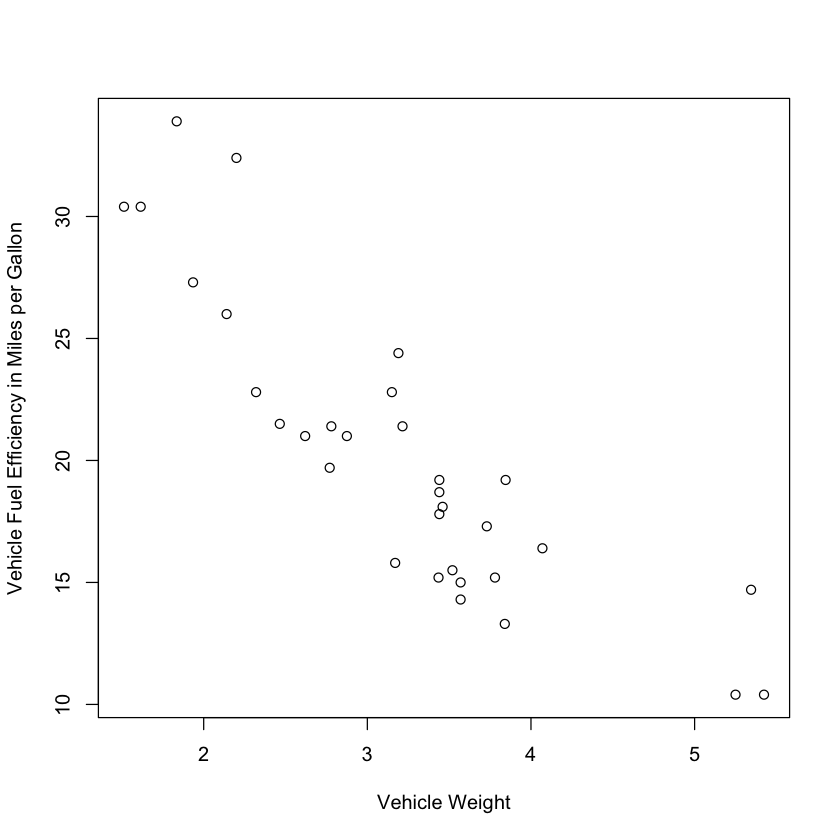

In [1]:
plot(y = mtcars$mpg, x = mtcars$wt, xlab = "Vehicle Weight",ylab = "Vehicle Fuel Efficiency in Miles per Gallon")

Now we have a more interesting kind of dataset. We still have our fuel efficiency, but now it is plotted against 
the weight of the respective cars in tons. From this kind of format of the data, we can extract a best fit to all the data points and turn this plot into an equation.

# Go to Slides

**** We have predictive power, given some kind of input (e.g., weight), that can give us a value for any number we 
put in.

The model might have its limitations, but this is one way in which we can help to expand the data beyond a static report into something more flexible and more insightful. A given vehicle’s weight might not actually be predictive of the fuel efficiency as given by the preceding equation. There might be some error in the data or
the observation.

## 1.1 Modeling Limitations

Statistician George Box is often quoted for the caveat, **All models are wrong, but some are useful.** A model is a simplified picture of reality. In reality, systems are complex and ever changing. The human brain is phenomenal at being able to discover patterns and make sense of the universe around us, but even our senses are
limited. All models, be they mathematical, computational, or otherwise are limited by the same human brain that designs them.

Machine learning modeling in all its forms is just an approximation of the universe that we are studying.

## Machine Learning

Regression: These models are very common, and it’s likely that you encountered one in high
school math classes. They are primarily used for looking at how data evolves with
respect to another variable (e.g., time) and examining what you can do to predict
values in the future.

Classification: These models are used to organize your data into schemes that make categorical
sense. For instance, consider the aforementioned store labeling example—stores
that sell more than 10 units per week could be classified as good performers,
whereas those selling fewer than that number would be classified as poor.

Mixed: These models can often rely on parts of regression to inform how to do classifica‐
tion, or sometimes the opposite. One case might be looking at sales data over
time and whether there is a rapid change in the slope of the line in some time
period.

### Regression

Let’s take a look at an example regression problem:

In [1]:
resid <- function(y_hat, y){
  return(y - y_hat)
}

## The Analytical solution

In [2]:
l_regression <- function(X, y){
  X <- cbind(1, X)
  A <- solve(t(X) %*% X) # calculates the inverse
  theta <- A %*% t(X) %*% y
  return(theta)
}


X <- cars$speed
y <- cars$dist

theta <- l_regression(X, y)
theta

sum(resid(cbind(1,X) %*% theta, y))


,-17.579095
X,3.932409


[1] 5.346834e-12

## The Gradient Descent approach:

In [4]:
grad_desc <- function(X, y, alpha = 0.006, epsilon = 10^-10){
  i <- 0
  X <- cbind(1, X)
  theta <- matrix(data = 1, nrow = ncol(X), ncol= 1)
  cost <- (1/(2*nrow(X))) * t(X %*% theta - y) %*% (X %*% theta - y)
  print(cost)
  delta <- 1
  while(delta > epsilon){
    i <- i + 1
    theta <- theta - (alpha / nrow(X)) * (t(X) %*% (X %*% theta - y))
    cval <- (1/(2*nrow(X))) * t(X %*% theta - y) %*% (X %*% theta - y)
    cost <- append(cost, cval)
    delta <- abs(cost[i+1] - cost[i])
  }
  print(sprintf("Completed in %i iterations.", i))
  return(theta)
}

X <- cars$speed
y <- cars$dist

theta <- grad_desc(X, y)
theta

sum(resid(cbind(1,X) %*% theta, y))

       [,1]
[1,] 584.59
[1] "Completed in 15519 iterations."


,-17.577847
X,3.932336


[1] -0.006440609

## The R function:

In [5]:

ca
$<))$fablibli<lm_model <- lm(y ~ X) 
theta <- summary(lm_model)$coefficients[,1]
theta

sum(resid(cbind(1,X) %*% theta, y))

(Intercept)           X 
 -17.579095    3.932409

[1] -3.801404e-13

In [ ]:
head(mtcars)

The next figure plots the fuelefficiency of the cars ( mpg ) in the dataset as a function of their engine size, or displacement ( disp ) in cubic inches:

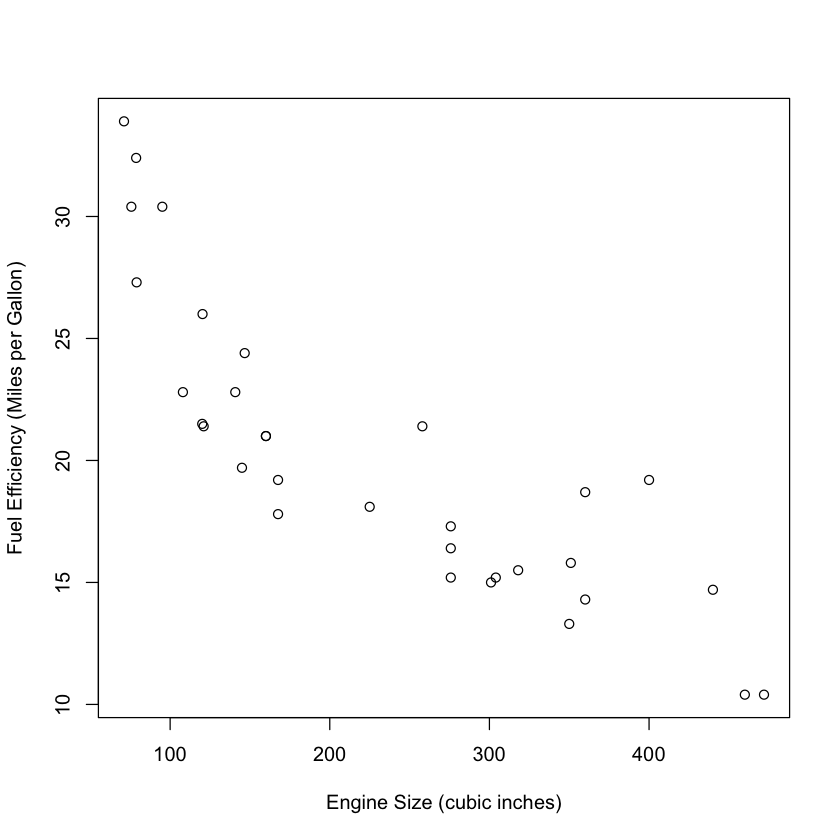

In [7]:
plot(y = mtcars$mpg, x = mtcars$disp, xlab = "Engine Size (cubic inches)",
ylab = "Fuel Efficiency (Miles per Gallon)")

We can see from the plot that the fuel efficiency decreases as the size of the engine increases

However, if you have some new engine for which you want to know the efficiency, the plot in that figute doesn’t really give you an exact answer. For that, you
need to build a linear model:

In [8]:
model <- lm(mtcars$mpg ~ mtcars$disp)
coef(model)

(Intercept) mtcars$disp 
29.59985476 -0.04121512

Fuel Efficiency = -0.041 × Engine Size + 29.6

Look: The cornerstone for regression modeling in R is the lm() function.

You
might recall that regression modeling is of the form y = mx + b, where the output y is
determined from a given slope m, intercept b, and input data x. Your linear model in
this case is given by the coefficients that you just computed

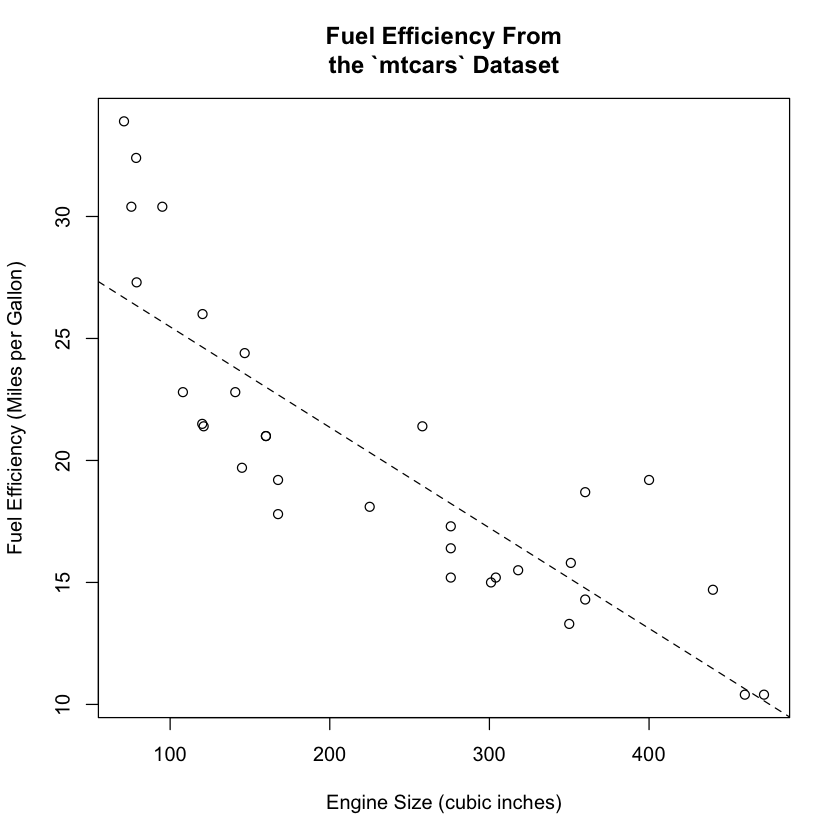

In [6]:
model <- lm(mtcars$mpg ~ mtcars$disp)
plot(y = mtcars$mpg, x = mtcars$disp, xlab = "Engine Size (cubic inches)",
ylab = "Fuel Efficiency (Miles per Gallon)", main = "Fuel Efficiency From
the `mtcars` Dataset")
abline(a = coef(model[1]), b = coef(model)[2], lty = 2)

## Exercise

Investigate if the Car Weight has some impact on its Fuel Efficiency. How good is your model?

In [23]:
mt.model <- lm(formula = mpg ~ wt, data = mtcars)

In [24]:
summary(mt.model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [25]:
coef(mt.model)[2]

wt 
-5.344472

In [26]:
coef(mt.model)[1]

(Intercept) 
   37.28513

Fuel Efficiency = -5.344 × Vehicle Weight + 37.285

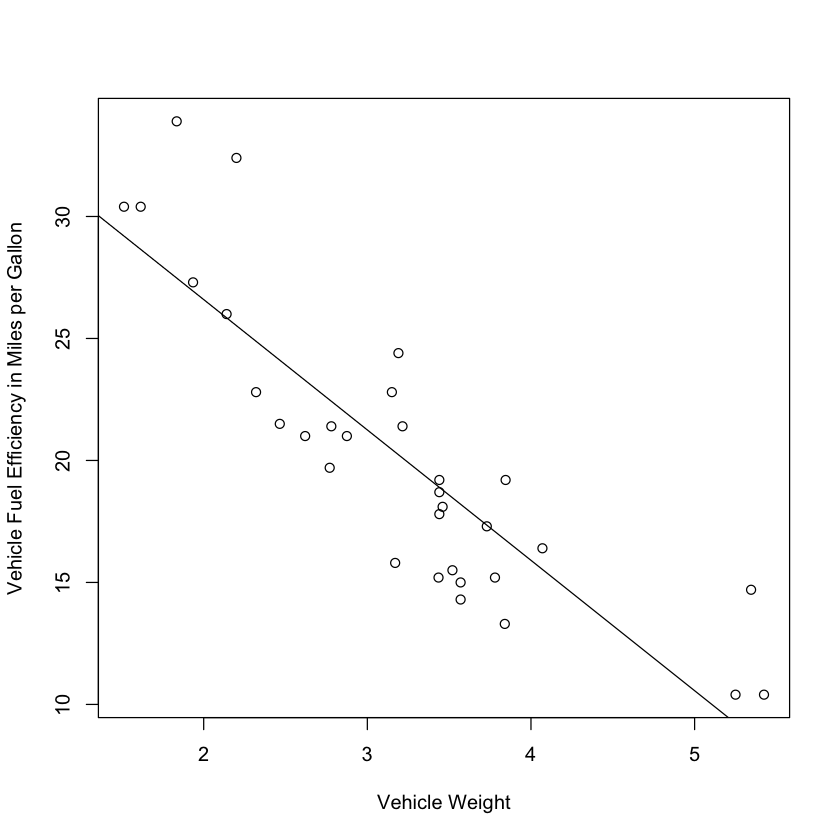

In [27]:
plot(y = mtcars$mpg, x = mtcars$wt, xlab = "Vehicle Weight",ylab = "Vehicle Fuel Efficiency in Miles per Gallon")
abline(mt.model)

In [28]:
summary(mt.model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


## Slides...

# Multiple Linear Regression

In [81]:
adv <- read.csv("Day1/Advertising.csv", header = TRUE, 
                colClasses = c("NULL", NA, NA, NA, NA)); # Drop First Col.
head(adv);

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


Exploring Simple correlations

In [33]:
attach(adv)
adv.lm1 <- lm(sales ~ TV);
summary(adv.lm1);


Call:
lm(formula = sales ~ TV)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


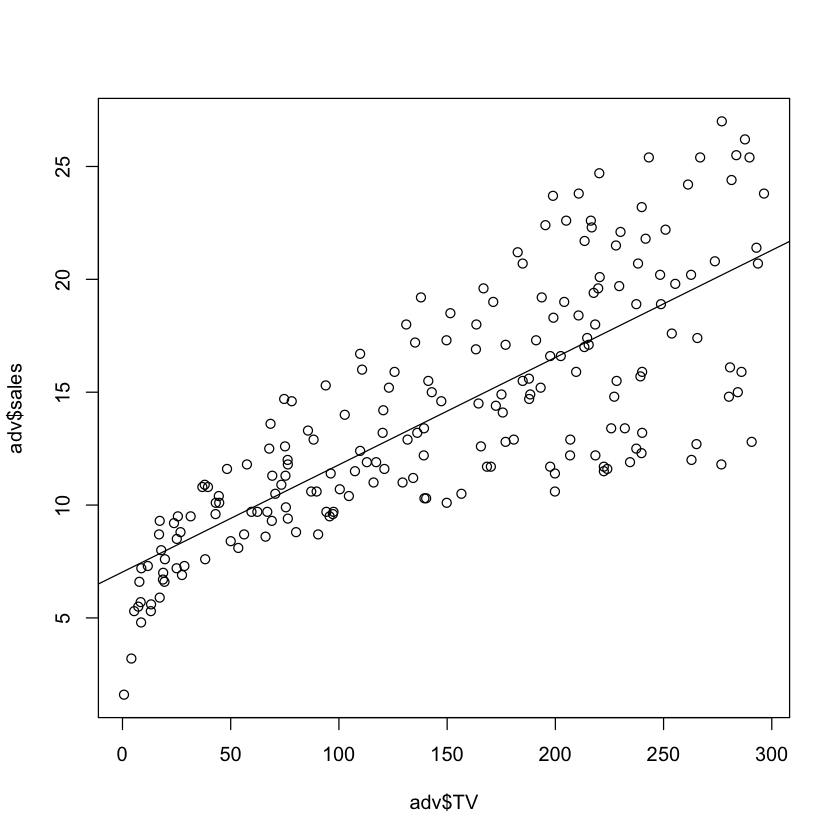

In [36]:
plot(x=adv$TV, y=adv$sales)
abline(adv.lm1)

In [34]:
adv.lm2 <- lm(sales ~ radio);
summary(adv.lm2);


Call:
lm(formula = sales ~ radio)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


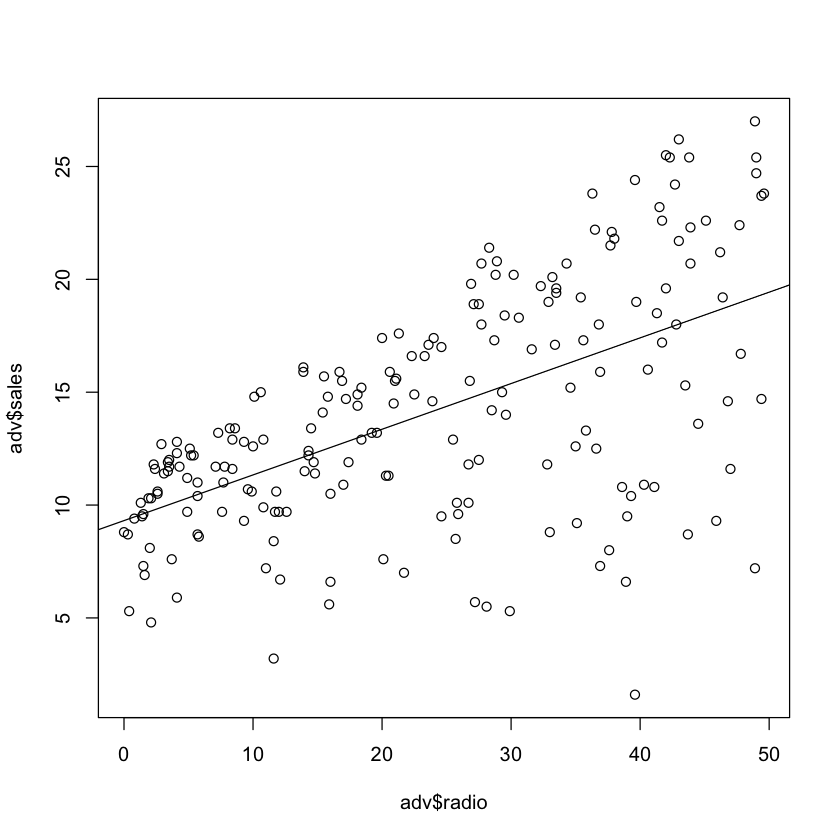

In [37]:
plot(x=adv$radio, y=adv$sales)
abline(adv.lm2)

In [35]:
adv.lm3 <- lm(sales ~ newspaper);
summary(adv.lm3);


Call:
lm(formula = sales ~ newspaper)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


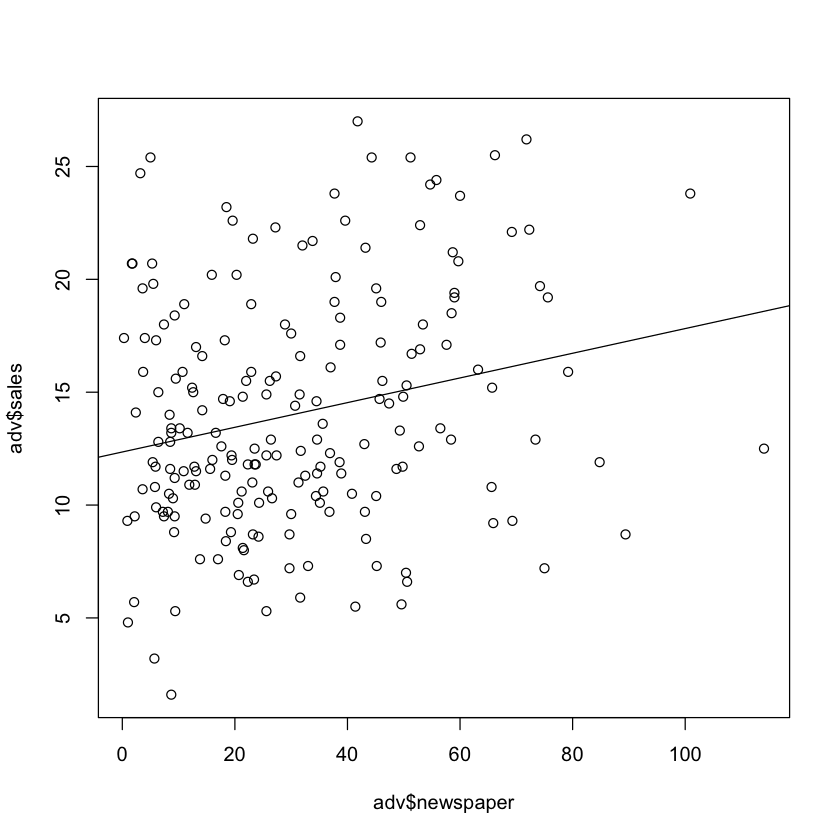

In [38]:
plot(x=adv$newspaper, y=adv$sales)
abline(adv.lm3)

In [39]:
complex_formula <- sales ~ TV + radio + newspaper

In [40]:
adv.lm4 <- lm(formula=complex_formula, data = adv)

In [41]:
adv.lm4$coefficients

(Intercept)           TV        radio    newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493

Revenue = 0.045 x TV + 0.2 x RADIO - 0.001 NEWSPAPER + 2.94

* The coefficient estimate for newspaper in the multiple regression model is close to zero;
* Increase in newspaper advertising, ignoring other predictors;

Does it make sense for the multiple regression to suggest no relationship between sales and newspaper while the simple linear regression implies the opposite?

In [44]:
cor(adv)

,TV,radio,newspaper,sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
radio,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


In [83]:
library(car)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:modeltools’:

    Predict



In [84]:
prestige.dataset <- Prestige

In [85]:
head(prestige.dataset)

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


In [91]:
p1 <- lm(prestige ~ education, data=prestige.dataset)
summary(p1)


Call:
lm(formula = prestige ~ education, data = prestige.dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0397  -6.5228   0.6611   6.7430  18.1636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -10.732      3.677  -2.919  0.00434 ** 
education      5.361      0.332  16.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.103 on 100 degrees of freedom
Multiple R-squared:  0.7228,	Adjusted R-squared:   0.72 
F-statistic: 260.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [92]:
p2 <- lm(prestige ~ income, data=prestige.dataset)

In [93]:
summary(p2)


Call:
lm(formula = prestige ~ income, data = prestige.dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.007  -8.378  -2.378   8.432  32.084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.714e+01  2.268e+00   11.97   <2e-16 ***
income      2.897e-03  2.833e-04   10.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.09 on 100 degrees of freedom
Multiple R-squared:  0.5111,	Adjusted R-squared:  0.5062 
F-statistic: 104.5 on 1 and 100 DF,  p-value: < 2.2e-16


In [94]:
p3 <- lm(prestige ~ education + income, data=prestige.dataset)

In [95]:
summary(p3)


Call:
lm(formula = prestige ~ education + income, data = prestige.dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
education    4.1374444  0.3489120  11.858  < 2e-16 ***
income       0.0013612  0.0002242   6.071 2.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


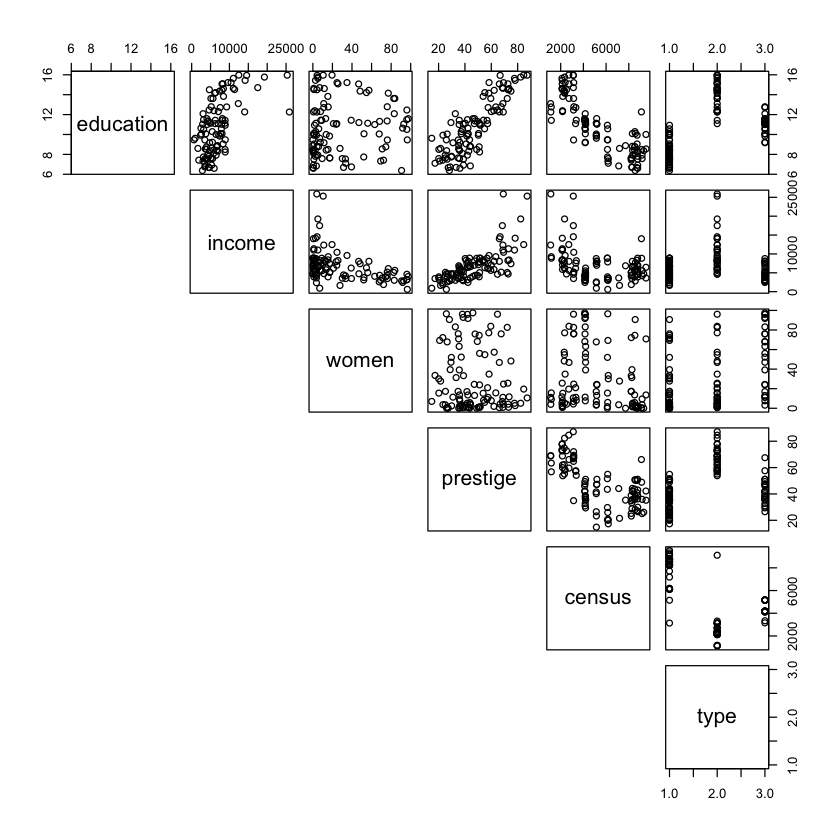

In [90]:
pairs(prestige.dataset, lower.panel=NULL)

## slides

## 2.1.2 Polynomial Regression

Polynomial regression is simply fitting a higher degree function to the data. Polynomial regression differs from the simple linear cases by having multiple degrees for each feature in the dataset.

The following example will help with our reasoning:



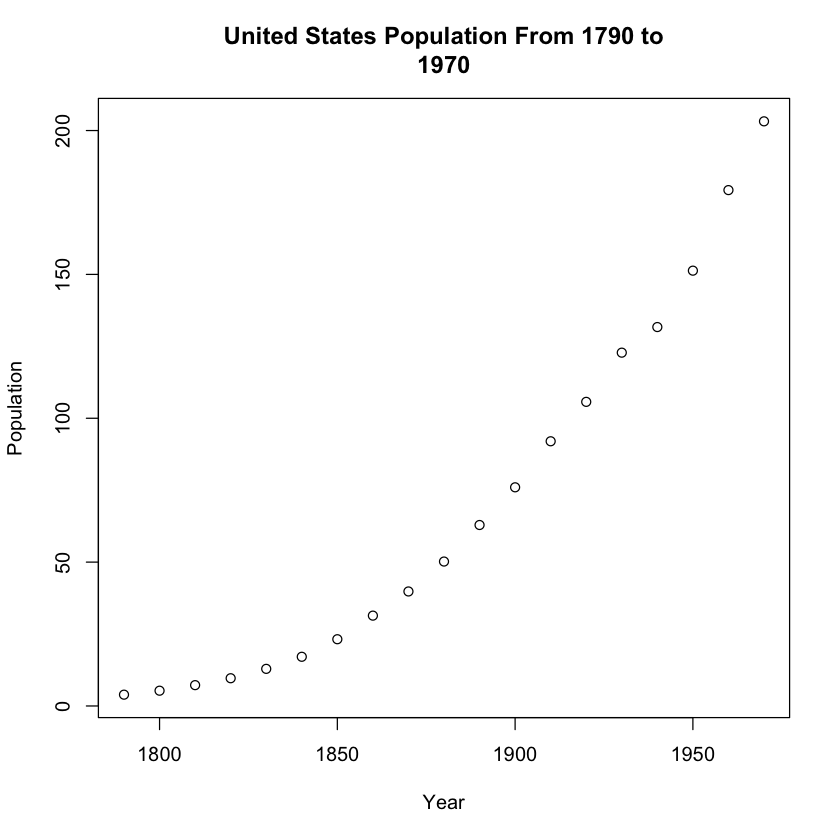

In [67]:
pop <- data.frame(uspop)
pop$uspop <- as.numeric(pop$uspop)
pop$year <- seq(from = 1790, to = 1970, by = 10)
plot(y = pop$uspop, x = pop$year, main = "United States Population From 1790 to
1970",
xlab = "Year", ylab = "Population")

In [68]:
head(uspop)

[1]  3.93  5.31  7.24  9.64 12.90 17.10

In [69]:
lm1 <- lm(pop$uspop ~ pop$year)
summary(lm1)


Call:
lm(formula = pop$uspop ~ pop$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.569 -14.776  -2.933   9.501  36.345 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.958e+03  1.428e+02  -13.71 1.27e-10 ***
pop$year     1.079e+00  7.592e-02   14.21 7.29e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.12 on 17 degrees of freedom
Multiple R-squared:  0.9223,	Adjusted R-squared:  0.9178 
F-statistic: 201.9 on 1 and 17 DF,  p-value: 7.286e-11


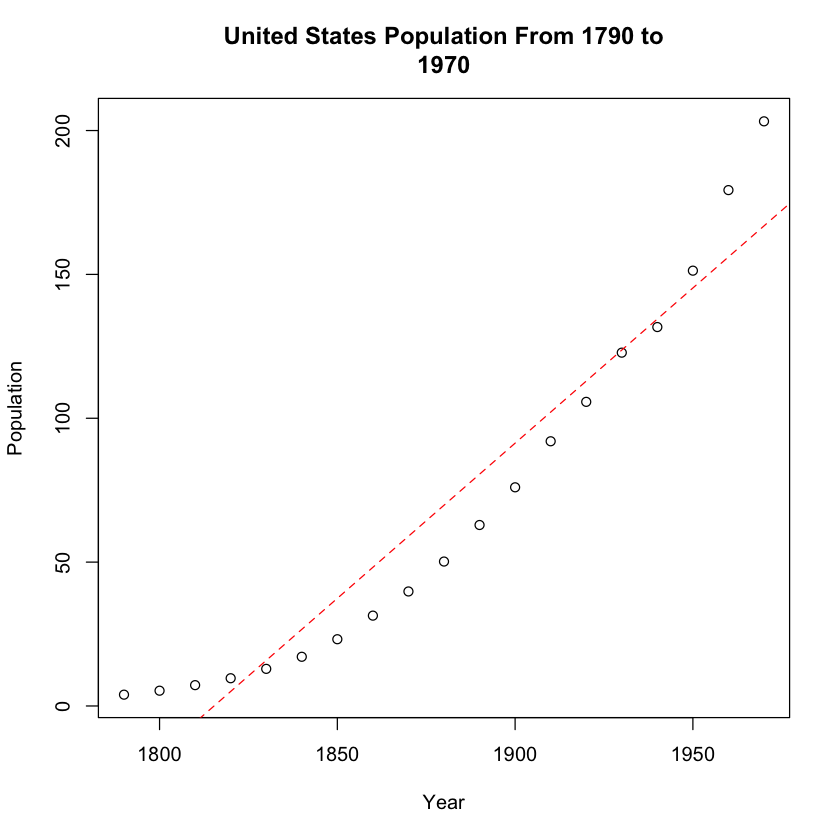

In [70]:
plot(y = pop$uspop, x = pop$year, main = "United States Population From 1790 to
1970",
xlab = "Year", ylab = "Population")
abline(a = coef(lm1[1]), b = coef(lm1)[2], lty = 2, col = "red")

In [71]:
lm2 <- lm(pop$uspop ~ poly(pop$year, 2))
summary(lm2)


Call:
lm(formula = pop$uspop ~ poly(pop$year, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5997 -0.7105  0.2669  1.4065  3.9879 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         69.7695     0.6377  109.40  < 2e-16 ***
poly(pop$year, 2)1 257.5420     2.7798   92.65  < 2e-16 ***
poly(pop$year, 2)2  73.8974     2.7798   26.58 1.14e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.78 on 16 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9981 
F-statistic:  4645 on 2 and 16 DF,  p-value: < 2.2e-16


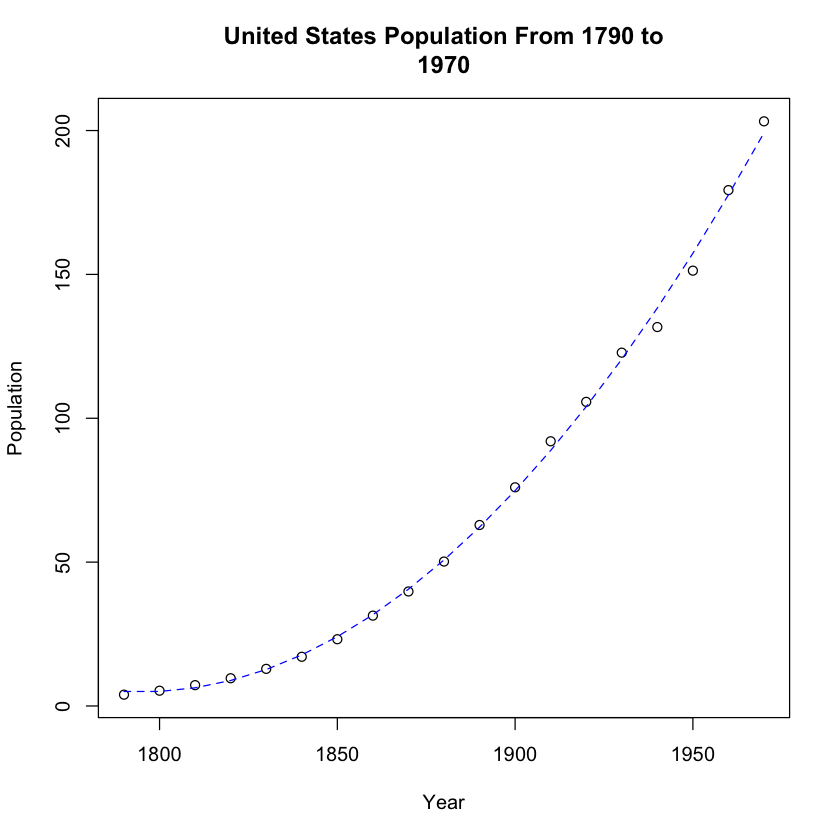

In [72]:
plot(y = pop$uspop, x = pop$year, main = "United States Population From 1790 to
1970",
xlab = "Year", ylab = "Population")
lines(sort(pop$year), fitted(lm2)[order(pop$year)], col = "blue",
lty = 2)

 ## 2.2 Classification

In contrast to regression modeling, which you have likely previously done without
realizing it, classification is a less frequently encountered part of the machine learning
spectrum. Instead of predicting continuous values, like numbers, in classification
exercises we’ll predict discrete values.

### 2.2.1 Logistic Regression

In contrast to regression, sometimes you want to see if a given data point is of a categorical nature instead of numeric. Before, we were given a numeric input and calculated a numeric output through a simple regression formula. The next plot presents the same mtcars dataset to visually explain the difference:

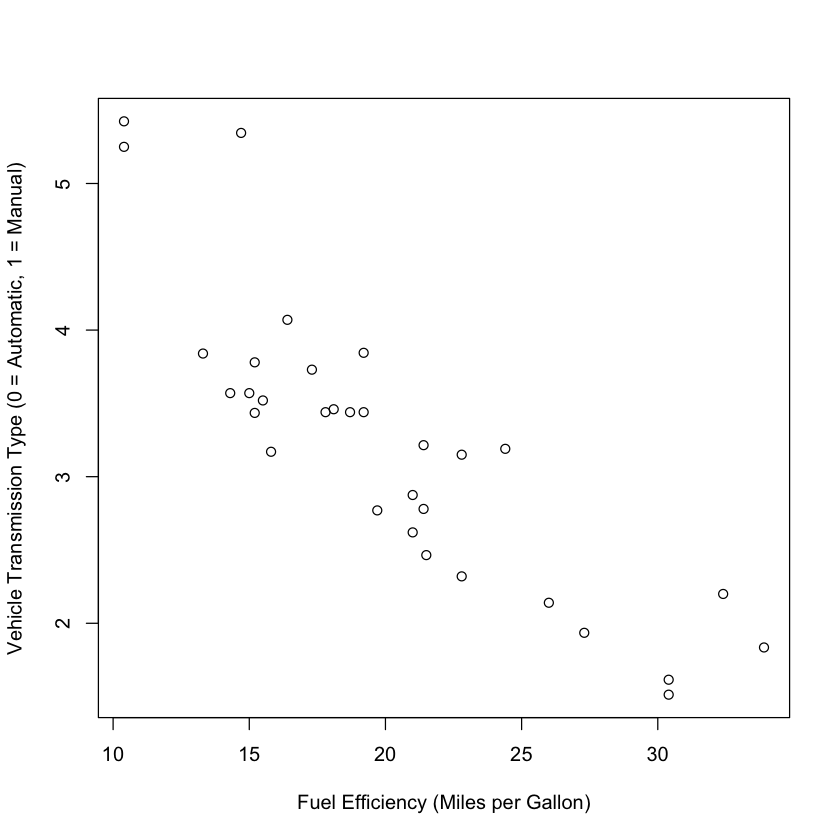

In [6]:
plot(x = mtcars$mpg, y = mtcars$wt, xlab = "Fuel Efficiency (Miles per Gallon)",
ylab = "Vehicle Transmission Type (0 = Automatic, 1 = Manual)")

The data looks very different compared to what we saw earlier. In the mtcars dataset,
each car is given a 0 or a 1 label to determine whether it has an automatic transmis‐
sion as defined by the column name am . A car with an automatic has a value 1,
whereas a manual transmission car has a value of 0. Fitting a linear regression model
to this data would not work, because we cannot have half a transmission value.
Instead, we need to rely on a logistic regression model to help classify whether new
efficiency data belongs to either the automatic or manual transmission groups.

We have a slightly different question to answer this time: how is the fuel efficiency
related to a car’s transmission type? We can’t rely on the regression modeling proce‐
dure here, unfortunately. We could try to fit a regression line to the data, but the
results would be very misleading. Instead, we need to use a classification algorithm.
In this case, we will use a logistic regression algorithm.

In [99]:
cars.logistic <- glm(am ~ mpg + wt, data = mtcars, family = "binomial")
cars.logistic


Call:  glm(formula = am ~ mpg + wt, family = "binomial", data = mtcars)

Coefficients:
(Intercept)          mpg           wt  
    25.8866      -0.3242      -6.4162  

Degrees of Freedom: 31 Total (i.e. Null);  29 Residual
Null Deviance:	    43.23 
Residual Deviance: 17.18 	AIC: 23.18

In [100]:
int.cars <- (-coef(cars.logistic)[1])/coef(cars.logistic)[3]
slope.cars <- (-coef(cars.logistic)[2])/coef(cars.logistic)[3]

In [101]:
slope.cars

mpg 
-0.05052294

In [102]:
int.cars

(Intercept) 
   4.034579

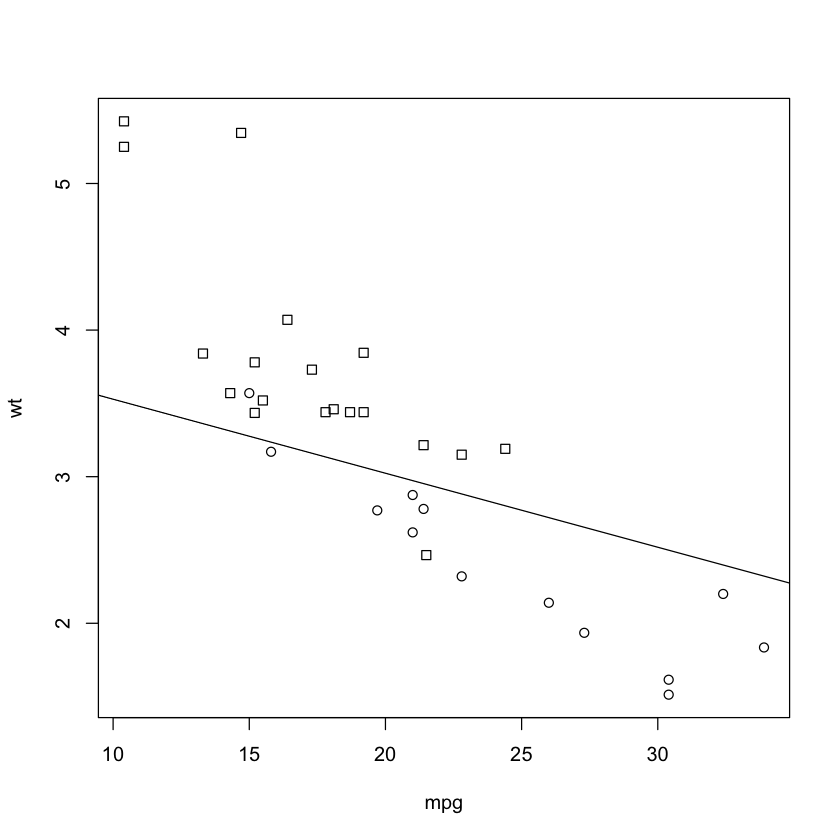

In [103]:
plot( wt ~ mpg, data=mtcars, pch = am)
abline(a=int.cars, b=slope.cars)

0 = Ax + By + C

Then the slope of the line is:

slope = -A/B

And the y-intercept is:

y-intercept = -C/B

### 2.2.2 Binary Classification

Everything we’ve done so far in terms of classification has been on binary data: the
tumor is either malignant or benign. Look at another example in which
we determine the classes based on the data’s distribution:

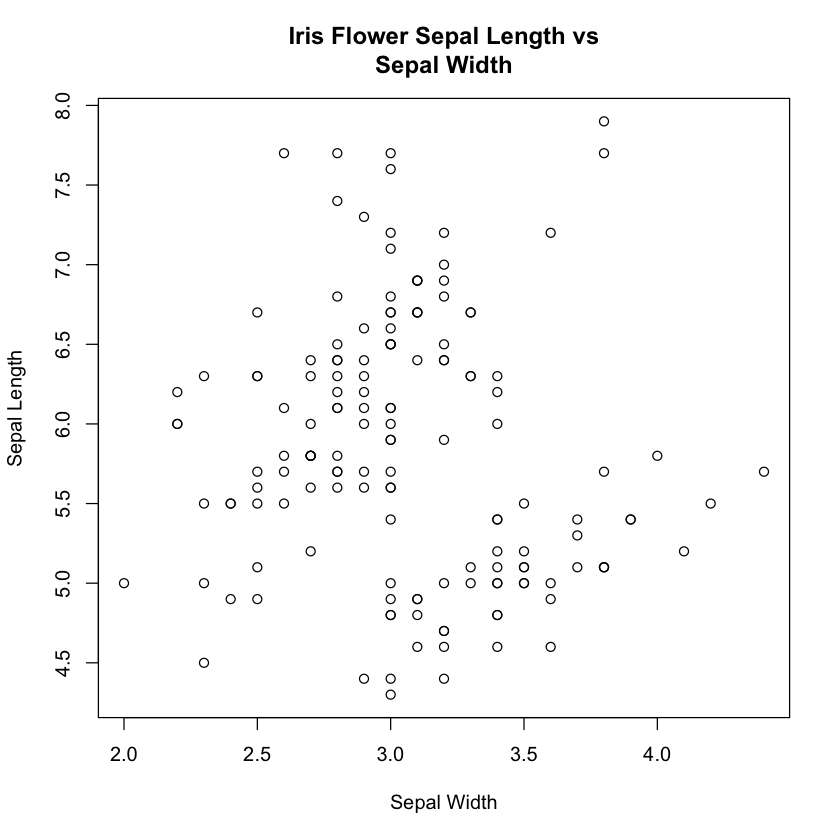

In [70]:
plot(iris$Sepal.Length ~ iris$Sepal.Width, main = "Iris Flower Sepal Length vs
Sepal Width",
xlab = "Sepal Width", ylab = "Sepal Length")

In the plot above, there are a bunch of data points and what appears to be two different
classes of plants. There looks to be a grouping of data points at the bottom of the plot
that seem to be more separated than the others. You can fit a logistic regression
model to this data and find the equation for the line that makes your decision bound‐
ary. Any points below that threshold will be classified as one type, and all the points
above the line will be classified as another type.

This test uses a generalized linear model, given by the function glm() . Its usage is
more flexible than that of the standard linear model function lm() in that you can use
it for classification purposes:

In [12]:
iris.binary <- iris
iris.binary$binary <- as.numeric(iris[, 5] == "setosa")
iris.logistic <- glm(binary ~ Sepal.Width + Sepal.Length, data = iris.binary,
family = "binomial")
iris.logistic

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = binary ~ Sepal.Width + Sepal.Length, family = "binomial", 
    data = iris.binary)

Coefficients:
 (Intercept)   Sepal.Width  Sepal.Length  
       437.2         137.9        -163.4  

Degrees of Freedom: 149 Total (i.e. Null);  147 Residual
Null Deviance:	    191 
Residual Deviance: 2.706e-08 	AIC: 6

In [27]:
int.iris <- -coef(iris.logistic)[1]/coef(iris.logistic)[3]
slope.iris <- -coef(iris.logistic)[2]/coef(iris.logistic)[3]
slope.iris

Sepal.Width 
  0.8440957

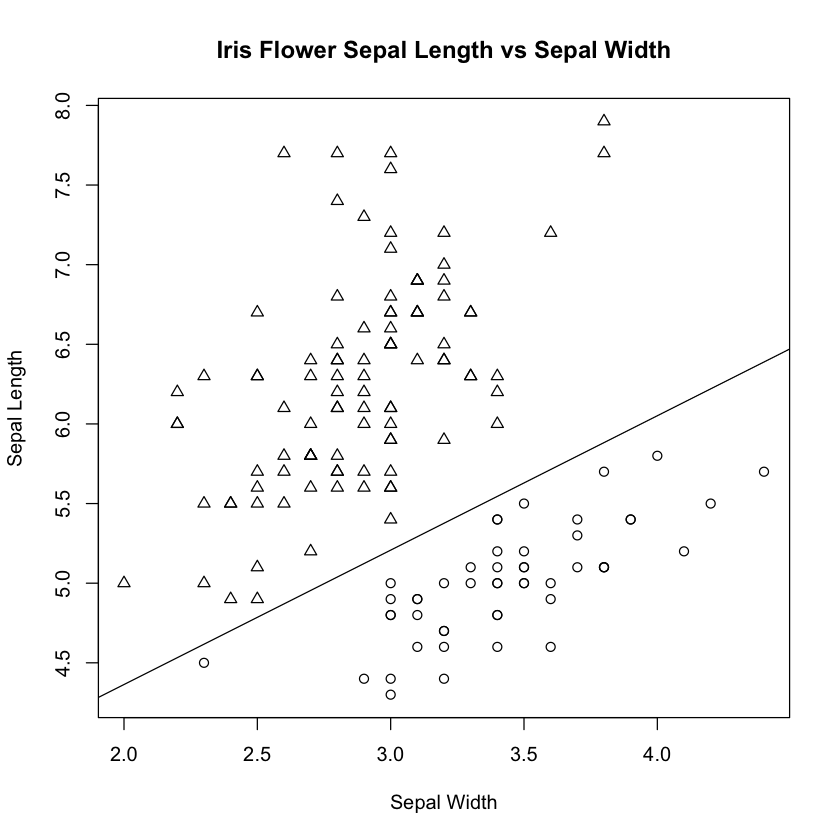

In [28]:
iris.binary$binary[iris.binary$binary == 0] <- 2
plot(Sepal.Length ~ Sepal.Width, data = iris.binary, pch = (binary),
main = "Iris Flower Sepal Length vs Sepal Width", xlab = "Sepal Width",
ylab = "Sepal Length")
abline(a = int.iris, b = slope.iris)

### 2.2.3 Multiclass Classification

If you want to find the splits in your data that define multiple classes and not just a
binary classification, you need to use multiclass classification. This approach is slightly
different in that you are basically applying the same binary classification scheme that
you have been doing thus far, but you are comparing the class you’re interested in
versus everything else.

In [ ]:
multi <- data.frame(x1 = c(0.03, 0.24, 0.21, 0, 0, 0.23, 0.6,
0.64, 0.86, 0.77), x2 = c(0.07, 0.06, 0.19, 1.15, 0.95, 1,
0.81, 0.64, 0.44, 0.74), lab = c(1, 1, 1, 2, 2, 2, 3, 3,
3, 3))
plot(x2 ~ x1, pch = lab, cex = 2, data = multi,
main = "Multi-Class Classification",
xlab = "x", ylab = "y")

There are three distinct classes of data, and you want to find some kind of lines that
split them into their own categories, much like you did for the binary case. What this
essentially boils down to is our simple binary test, but you change which group you’re
comparing against. This is called a “one-versus-all” or “one-versus-many” test, in
which you test three cases—triangles-versus-rest, circles-versus-rest, and crosses-
versus-rest, as depicted in the last plot.

In [ ]:
par(mfrow = c(1, 3))
multi$lab2 <- c(1, 1, 1, 4, 4, 4, 4, 4, 4, 4)
plot(x2 ~ x1, pch = lab2, cex = 2, data = multi,
main = "Multi-Class Classification",
xlab = "x", ylab = "y")
multi$lab3 <- c(4, 4, 4, 2, 2, 2, 4, 4, 4, 4)
plot(x2 ~ x1, pch = lab3, cex = 2, data = multi,
main = "Multi-Class Classification",
xlab = "x", ylab = "y")
multi$lab4 <- c(4, 4, 4, 4, 4, 4, 3, 3, 3, 3)
plot(x2 ~ x1, pch = lab4, cex = 2, data = multi,
main = "Multi-Class Classification",
xlab = "x", ylab = "y")

In [ ]:
library(nnet)
multi.model <- multinom(lab ~ x2 + x1, data = multi, trace = F)

In [ ]:
multi.model

In [ ]:
multi.int.1 <- -coef(multi.model)[1]/coef(multi.model)[3]
multi.slope.1 <- -coef(multi.model)[5]/coef(multi.model)[3]
multi.int.2 <- -coef(multi.model)[2]/coef(multi.model)[4]
multi.slope.2 <- -coef(multi.model)[6]/coef(multi.model)[4]
plot(x2 ~ x1, pch = lab, cex = 2, data = multi,
main = "Multi-Class Classification",
xlab = "x", ylab = "y")
abline(multi.int.1, multi.slope.1)
abline(multi.int.2, multi.slope.2)

# 2.3 Supervised Clustering Methods

Clustering is when you have a set of data and want to define classes based on how
closely they are grouped. Sometimes, groupings of data might not be immediately
obvious, and a clustering algorithm can help you find patterns where they might
otherwise be difficult to see explicitly. Clustering is a good example of an ecosystem
of algorithms that can be used both in a supervised and unsupervised case. It’s one of
the most popular forms of classification, and one of the most popular clustering
models is the kmeans algorithm.

Let’s examine the iris dataset by looking at the plot of petal width as a function of
petal length

In [ ]:
plot(x = iris$Petal.Length, y = iris$Petal.Width, xlab = "Petal Length",
ylab = "Petal Width")

In [ ]:
data = data.frame(iris$Petal.Length, iris$Petal.Width)

In [ ]:
iris.kmeans <- kmeans(data, 2)

In [ ]:
plot(x = iris$Petal.Length, y = iris$Petal.Width, pch = iris.kmeans$cluster,
xlab = "Petal Length", ylab = "Petal Width")
points(iris.kmeans$centers, pch = 8, cex = 2)

In the last plot  we can see how the algorithm works by splitting the data into two
major groups. In the lower left is one cluster, denoted by the small triangles, and in
the upper right there is another cluster labeled with circular data points. We see two
big asterisks that mark where the cluster centers have finally stopped iterating. Any
point that we further add to the data is marked as being in a cluster if it’s closer to one
versus another. The points in the lower left are pretty well distinct from the others,
but there is one outlier data point.

Let’s use one more cluster, next plot, to help make a little more sense of the data:

In [ ]:
iris.kmeans3 <- kmeans(data, 3)
plot(x = iris$Petal.Length, y = iris$Petal.Width, pch = iris.kmeans3$cluster,
xlab = "Petal Length", ylab = "Petal Width")
points(iris.kmeans3$centers, pch = 8, cex = 2)

Now you can see that the larger group of data has been split further into two clusters
of data that look to be about equal in size. There are three clusters in total with three
different centers to the data.

This is where you need to use a gut intuition to
determine the appropriate level of fitting to the data. Too few clusters and the data is
underfit: there isn’t a good way to determine structure. Too many clusters and you
have the opposite problem: there’s far too much structure to make sense of simply.

Let’s compare this result to the actual answer and see how good our prediction really is

In [ ]:
par(mfrow = c(1, 2))
plot(x = iris$Petal.Length, y = iris$Petal.Width, pch = iris.kmeans3$cluster,
xlab = "Petal Length", ylab = "Petal Width", main = "Model Output")
plot(x = iris$Petal.Length, y = iris$Petal.Width,
pch = as.integer(iris$Species),
xlab = "Petal Length", ylab = "Petal Width", main = "Actual Data")

# 2.4  Mixed Methods

### 2.4.1  Tree-Based Models

So far, we’ve seen a linear regression and logistic regression example. Part of the universe of machine learning models includes tree-based methods.

Simply put, a tree is a
structure that has nodes and edges. For a decision tree, at each node we might have a
value against which we split in order to gain some insight from the data. This is best
explained visually by looking at

In [ ]:
library(party)
tree <- ctree(mpg ~ ., data = mtcars)
plot(tree)

This plot demonstrates a plotted conditional inference tree. We are plotting engine
fuel efficiency (mpg), but we’re using all features in the dataset to build the model
instead of just one; hence, the mpg ~ . call in the ctree() function. The output is a
distribution (in the form of a box-and-whisker plot) of the fuel efficency as a function
of the major features that influence it. The ctree function calls on certain methods to
figure these out; this way, you don’t have a bunch of branches in the tree that don’t
amount to anything other than to clog up the view. In this case, the features that are
most important to mpg are disp (the engine displacement) and wt (the car’s weight).
You read this chart from top to bottom.

At node 1, there is a split for cars that weigh less than 2.32 tons and those that weigh
more. For the cars that weigh more, we split further on the engine displacement. For
engine displacements that are less than 258 cubic inches in volume, we go to node 4.
For engine displacements that have more than 258 cubic inches, we go to node 5.
Notice that for each feature there is a statistical p-value, which determines how statis‐
tically relevant it is. The closer the p-value is to 0.05 or greater, the less useful or rele‐
vant it is. In this case, a p-value of almost exactly 0 is very good. Likewise, you can see
how many data points make up each class at the bottom of the tree.

Let’s consider a car that has a weight of four tons, and a small engine size of 100 cubic
inches. At node 1, we go along the righthand path to node 3 (because the weight is
greater than 2.32 tons) and then go left to node 4 based on the theoretical data we just
made up. We should expect the fuel efficiency of this car to be somewhere between 13
and 25 miles per gallon.

What if you try to use this new data structure for prediction? The first thing that
should pop up is that you are looking at the entire dataset instead of just the training
data!

### Pruning Trees

To keep a tree-based model from overfitting, you need to prune the least important
leaves of the tree. You can do this through the use of the rpart package. First let’s
grow a tree by using the rpart() function. This is a function that recursively parti‐
tions the data to form a tree-based model. First, let’s take a quick look at the data
you’ll be modeling, which is automobile data from the 1990 edition of Consumer
Reports:


#### Challenge

In [35]:
iris$Species <- as.factor(iris$Species)

In [37]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

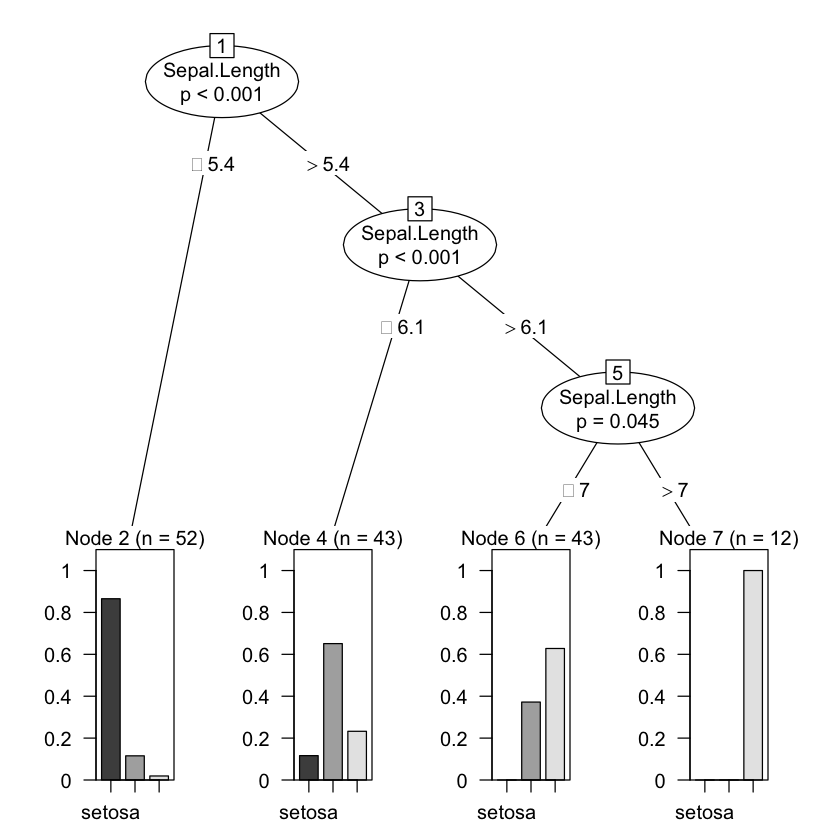

In [38]:
library(party)

iris.tree <- ctree(Species ~ Sepal.Length, data=iris)

plot(iris.tree)

## SVMs

In [39]:
library(e1071)

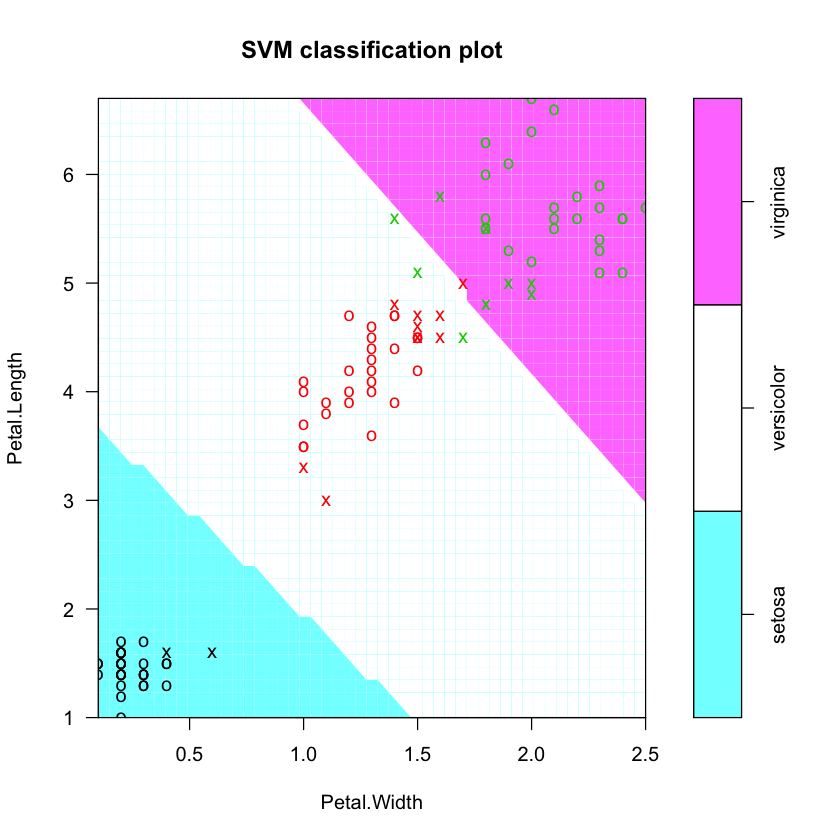

In [105]:
s <- sample(150, 100) 
col <- c("Petal.Length", "Petal.Width", "Species")
iris_train <- iris[s, col]
iris_test <- iris[-s, col]
svmfit <- svm(Species ~ ., data = iris_train, kernel = "linear")
plot(svmfit, iris_train)

# 3.0 Unsupervised Learning

So far, with supervised learning algorithms, we’ve taken a set of data, broken it into a
training and a test set, trained the model, and then evaluated its performance with the
test data. Unsupervised learning algorithms take a different approach in that they try
to define the overall structure of the data. In principle, these won’t have a test set
against which to evaluate the model’s performance.

Generally, most machine learning models you’ll encounter will be supervised learning
approaches. You build a model, train and test the data, and then compare the outputs
to some known parameters. Unsupervised learning doesn’t have any “answer” value
against which we compare to score the model. Model evaluation and scoring is done
in a slightly different manner in this regard. One example of which can be text min‐
ing. An unsupervised learner modeled on text from all of Abraham Lincoln’s writings
might be used to try to build an artificial intelligence (AI) that would write docu‐
ments like he would author, based on word frequency and proximity to other words.
Implicitly, there’s no immediate “right” answer against which you would evaluate
your Abraham Lincoln bot. Instead, you would need to score that case by what kind
of contextual sense the model would generate.

The most common form of unsupervised learning is clustering. We’ve seen clustering
in action already, masked in an example of supervised learning. We were able to run
with that example because we had an answer key to use for comparison. But what if
we didn’t have some data for which we knew the answer?

### 3.1 Unsupervised Clustering Methods

In this unsupervised version of clustering, you are going to take data that has no
explicit categorical label and try to categorize them yourself. If you generate some
random data, you don’t really know how it will cluster up. As this plot illustrates,
you can perform the usual kmeans clustering algorithm here to see how the data
should be classified:

In [46]:
dim(matrix(rnorm(100, sd = 0.3), ncol = 2))

[1] 50  2

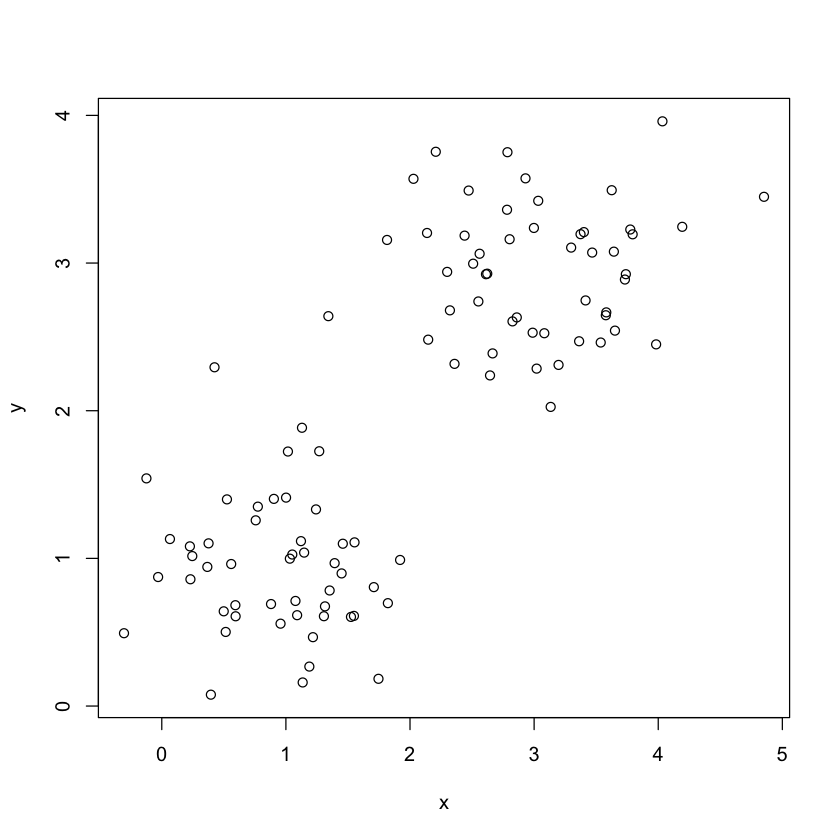

In [73]:
x <- rbind(matrix(rnorm(100, mean=3, sd=0.5), ncol = 2), 
           matrix(rnorm(100, mean=1, sd=0.5), 
                  ncol = 2))
colnames(x) <- c("x", "y")
plot(x)

A random distribution of data that we want to classify into two distinct
clusters; cases like these are difficult to figure out with the naked eye, but unsupervised
methods like kmeans can help

In [74]:
cl <- kmeans(x)
plot(x, col = cl$cluster)

ERROR: Error in kmeans(x): 'centers' must be a number or a matrix


In [75]:
iris.new <- iris[,c(1,2,3,4)]

In [76]:
summary(iris.new)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [79]:
cl <- kmeans(iris.new, centers = 3)

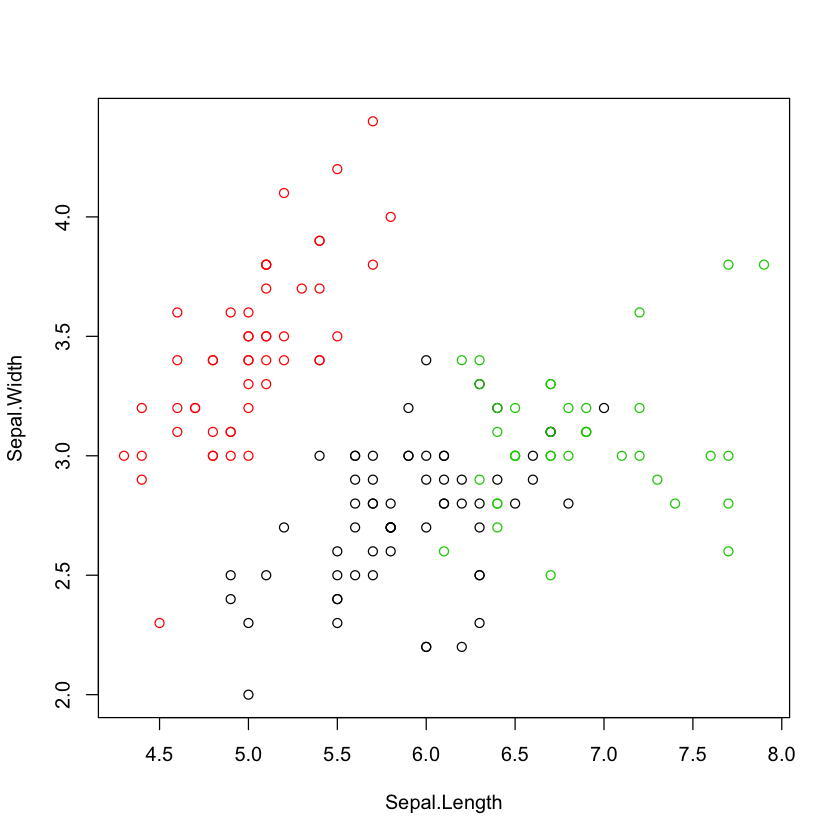

In [80]:
plot(iris.new[,c(1,2)], col=cl$cluster)

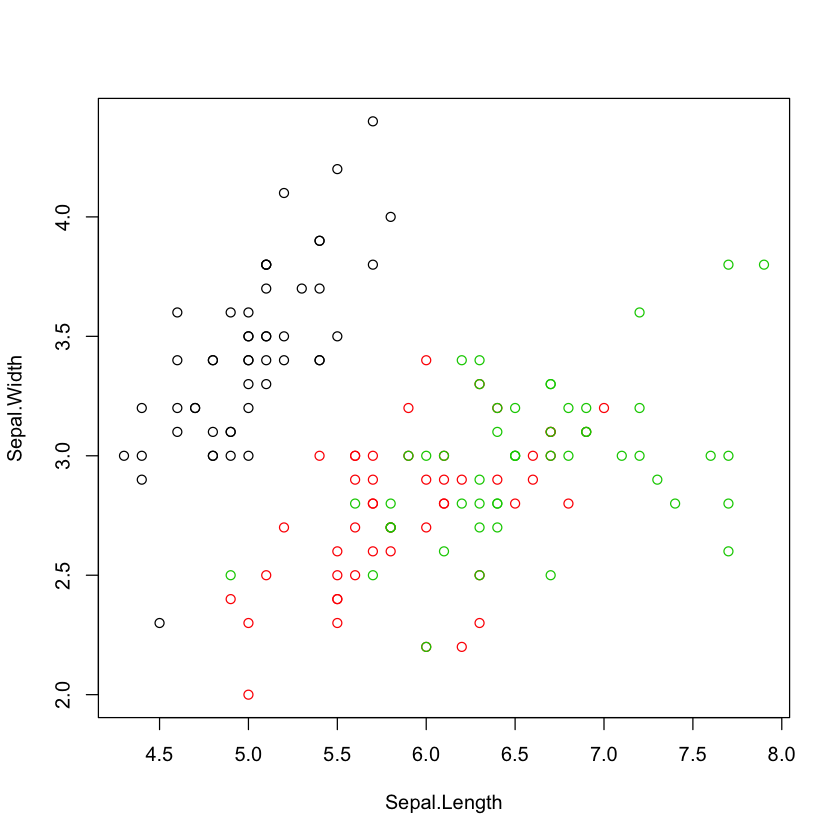

In [53]:
plot(iris[,c(1,2)], col=iris$Species)

## Ref: Introduction to Machine Learning with R, Scott V. Burger - ISBN:978-1-491-97644-9